In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt


url = 'C:/Users/Benedicta Martins/Downloads/Online Retail.csv'

df = pd.read_csv(url)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [6]:
output_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Type', 'Mode', 'Mean', 'Min', 
                                    '25%', 'Median', '75%', 'Max', 'Std', 'Skew'])

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, 
                            df[col].mode().values[0], df[col].mean(), df[col].min(), df[col].quantile(0.25), 
                            df[col].median(), df[col].quantile(0.95), df[col].max(), df[col].std(),
                            df[col].skew()]
    else:
      output_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].dtype, 
                             df[col].mode().values[0], '-', '-', '-', '-', '-', '-', '-', '-']

output_df.sort_values(by=['Count', 'Skew', 'Unique'], ascending=False)

,Count,Missing,Unique,Type,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew
InvoiceNo,541909,0,25900,object,573585,-,-,-,-,-,-,-,-
InvoiceDate,541909,0,23260,object,2011-10-31 14:41:00,-,-,-,-,-,-,-,-
StockCode,541909,0,4070,object,85123A,-,-,-,-,-,-,-,-
Country,541909,0,38,object,United Kingdom,-,-,-,-,-,-,-,-
UnitPrice,541909,0,1630,float64,1.25,4.611114,-11062.06,1.25,2.08,9.95,38970.0,96.759853,186.506972
CustomerID,541909,0,4372,int64,15287,15287.518434,12346,14367.0,15287.0,17841.0,18287,1484.746041,0.034781
Quantity,541909,0,722,int64,1,9.55225,-80995,1.0,3.0,29.0,80995,218.081158,-0.264076
Description,540455,1454,4223,object,WHITE HANGING HEART T-LIGHT HOLDER,-,-,-,-,-,-,-,-


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


In [8]:
# Convert the time into pandas data time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

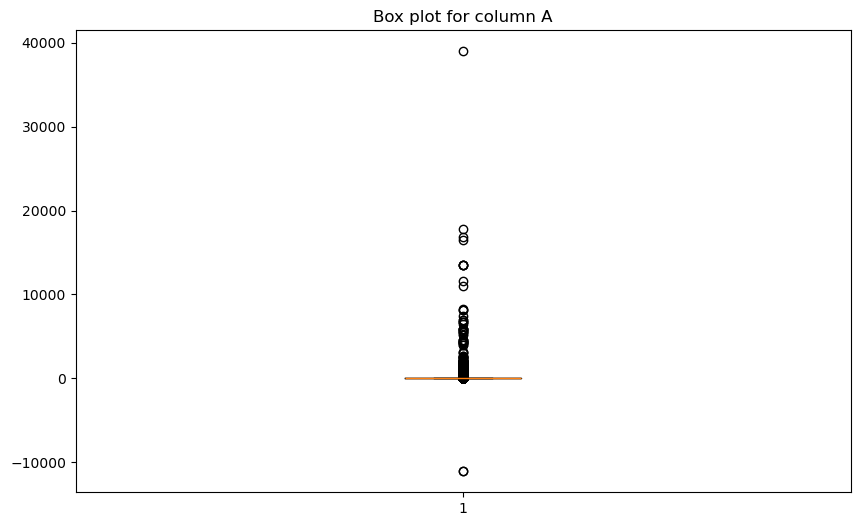

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['UnitPrice'])
plt.title('Box plot for column A')
plt.show()

In [10]:
# Removing the Outliers
# IQR method calculations
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers identified by the IQR method
df = df[~((df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound))]

In [11]:
# Removing the Outliers
# IQR method calculations
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers identified by the IQR method
df = df[~((df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound))]

In [12]:
df = df[df['Quantity'] >= 1]

In [13]:
df.count()

InvoiceNo      466477
StockCode      466477
Description    466025
Quantity       466477
InvoiceDate    466477
UnitPrice      466477
CustomerID     466477
Country        466477
dtype: int64

In [14]:
df['Sales_Price'] = df['UnitPrice'] * df['Quantity']

In [15]:
df['Quantity'].min()

1

In [16]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_Price
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


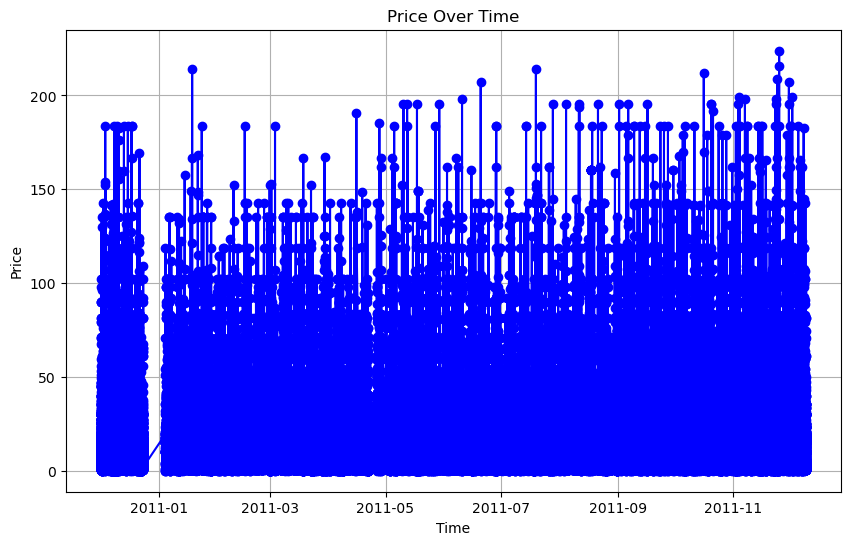

In [17]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df['InvoiceDate'], df['Sales_Price'], marker='o', linestyle='-', color='b')
plt.title('Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [18]:
# Aggregation Model

customer_sales_1_df = df.groupby(['CustomerID', 'InvoiceNo']).agg(
    total_Sales_Price=('Sales_Price', 'sum'),
    R_InvoiceDate=('InvoiceDate', 'max')
    ).reset_index()
customer_sales_1_df

,CustomerID,InvoiceNo,total_Sales_Price,R_InvoiceDate
0,12347,537626,650.89,2010-12-07 14:57:00
1,12347,542237,437.14,2011-01-26 14:30:00
2,12347,549222,325.00,2011-04-07 10:43:00
3,12347,556201,351.82,2011-06-09 13:01:00
4,12347,562032,440.46,2011-08-02 08:48:00
...,...,...,...,...
18833,18283,579673,223.61,2011-11-30 12:59:00
18834,18283,580872,208.00,2011-12-06 12:02:00
18835,18287,554065,440.28,2011-05-22 10:39:00
18836,18287,570715,513.52,2011-10-12 10:23:00


In [19]:
customer_sales_2_df = customer_sales_1_df.groupby('CustomerID').agg(
                            # Time difference in days
                            time_days=('R_InvoiceDate', lambda x: (x.max() - x.min()).days),
                            # Count of unique 'Invoice No'
                            frequency = ('InvoiceNo', 'nunique'),
                            # Sum of sales_price
                            total_sales=('total_Sales_Price', 'sum'),
                            avg_sales=('total_Sales_Price', 'mean')).reset_index()

customer_sales_2_df

,CustomerID,time_days,frequency,total_sales,avg_sales
0,12347,365,7,3412.53,487.504286
1,12348,109,3,90.20,30.066667
2,12349,0,1,1197.15,1197.150000
3,12350,0,1,294.40,294.400000
4,12352,260,7,1147.44,163.920000
...,...,...,...,...,...
4192,18280,0,1,160.70,160.700000
4193,18281,0,1,46.92,46.920000
4194,18282,118,2,113.13,56.565000
4195,18283,333,16,2051.98,128.248750


In [20]:
summary_1 = {
    'average_sales': customer_sales_2_df['avg_sales'].mean(),
    'average_purchase_freq': customer_sales_2_df['frequency'].mean
    (),
    'churn_rate': 1 - (customer_sales_2_df['frequency'] > 3).sum
    () / len(customer_sales_2_df['frequency']),
    'max_days': customer_sales_2_df['time_days'].max()
}

summary_1

{'average_sales': 263.4940865008682,
 'average_purchase_freq': 4.488444126757208,
 'churn_rate': 0.6640457469621158,
 'max_days': 373}

In [21]:
summary_1_df = pd.DataFrame(summary_1, index=[0])
summary_1_df

,average_sales,average_purchase_freq,churn_rate,max_days
0,263.494087,4.488444,0.664046,373


In [22]:
profit_margin = 0.15
eps_churn_rate = 0.005

In [23]:
summary_1_df['CLV_churn_rate'] = (summary_1_df['average_sales'] 
* summary_1_df['average_purchase_freq'] / (summary_1_df
['churn_rate'] + eps_churn_rate))

summary_1_df['CLV_churn_rate']

# Customer has spent:::::::

0    1767.709443
Name: CLV_churn_rate, dtype: float64

In [24]:
# Churn CLV Calculation
summary_1_df['CLV_churn_rate_profit'] = (summary_1_df['average_sales'] 
* summary_1_df['average_purchase_freq'] / (summary_1_df
['churn_rate'] + eps_churn_rate)) * profit_margin

summary_1_df['CLV_churn_rate_profit']

# The profit we make per customer

0    265.156417
Name: CLV_churn_rate_profit, dtype: float64

In [25]:
summary_1_df['CLV_lifetime_method'] = (summary_1_df['average_sales'] 
* summary_1_df['average_purchase_freq'] / (summary_1_df
['max_days'] / 365))

summary_1_df['CLV_lifetime_method']

0    1157.312727
Name: CLV_lifetime_method, dtype: float64

In [26]:
# Customer CLV Calculation
summary_1_df['CLV_lifetime_method_profit'] = (summary_1_df['average_sales'] 
* summary_1_df['average_purchase_freq'] / (summary_1_df
['max_days'] / 365)) * profit_margin

summary_1_df['CLV_lifetime_method_profit']

0    173.596909
Name: CLV_lifetime_method_profit, dtype: float64

In [27]:
summary_1_df

,average_sales,average_purchase_freq,churn_rate,max_days,CLV_churn_rate,CLV_churn_rate_profit,CLV_lifetime_method,CLV_lifetime_method_profit
0,263.494087,4.488444,0.664046,373,1767.709443,265.156417,1157.312727,173.596909


In [28]:
# Cohort Model

# Cohort models are used to calculate the average customer lifetime value for a group of customers of a cohort.
# Often Times, the cohort is defined by the customer's first purchase date.

In [29]:
profit_margin = 0.15
eps_churn_rate = 0.005

In [30]:
# Calculate start_month for each customer
df['start_month'] = df.groupby('CustomerID')['InvoiceDate'].transform(lambda x: x.min().strftime('%m'))
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales_Price,start_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12


In [31]:
Cohort_sales_1_df = df.groupby(
    ['start_month', 'CustomerID', 'InvoiceNo']).agg(
    total_Sales_Price=('Sales_Price', 'sum'),
    R_InvoiceDate=('InvoiceDate', 'max')
    ).reset_index()

Cohort_sales_1_df

,start_month,CustomerID,InvoiceNo,total_Sales_Price,R_InvoiceDate
0,01,12356,541430,818.70,2011-01-18 09:50:00
1,01,12356,549435,267.86,2011-04-08 12:33:00
2,01,12359,540946,221.00,2011-01-12 12:43:00
3,01,12359,543370,864.91,2011-02-07 14:51:00
4,01,12359,555477,883.87,2011-06-03 12:26:00
...,...,...,...,...,...
18833,12,18260,546561,528.85,2011-03-15 10:34:00
18834,12,18260,549947,375.81,2011-04-13 12:47:00
18835,12,18260,553575,297.12,2011-05-18 10:08:00
18836,12,18260,557431,414.63,2011-06-20 12:37:00


In [32]:
Cohort_sales_2_df = Cohort_sales_1_df.groupby(['start_month', 'CustomerID']).agg(
                            # Time difference in days
                            time_days=('R_InvoiceDate', lambda x: (x.max() - x.min()).days),
                            # Count of unique 'Invoice No'
                            frequency=('InvoiceNo', 'nunique'),
                            # Sum of sales_price
                            total_sales=('total_Sales_Price', 'sum'),
                            avg_sales=('total_Sales_Price', 'mean')).reset_index()

Cohort_sales_2_df

,start_month,CustomerID,time_days,frequency,total_sales,avg_sales
0,01,12356,80,2,1086.56,543.280000
1,01,12359,274,4,3642.33,910.582500
2,01,12388,311,6,2466.70,411.116667
3,01,12393,260,4,1193.50,298.375000
4,01,12402,0,1,195.60,195.600000
...,...,...,...,...,...,...
4192,12,18239,153,5,1473.71,294.742000
4193,12,18245,347,7,2377.63,339.661429
4194,12,18259,341,3,2203.60,734.533333
4195,12,18260,185,6,2206.81,367.801667


In [33]:
summary_2_df = Cohort_sales_2_df.groupby(
    'start_month').agg(
        cohort_size=('CustomerID', 'nunique'),
        average_sales=('avg_sales', 'mean'),
        average_purchase_freq=('frequency', 'mean'),
        churn_rate=('frequency', lambda x: 1 - (x > 3).sum() / len(x)),
        max_days=('time_days', 'max')
    ).reset_index()

summary_2_df


,start_month,cohort_size,average_sales,average_purchase_freq,churn_rate,max_days
0,01,398,276.407188,5.123116,0.452261,337
1,02,358,262.370108,3.963687,0.586592,308
2,03,443,261.121836,3.413093,0.647856,280
3,04,289,261.739733,2.986159,0.664360,250
4,05,278,251.780414,2.823741,0.751799,218
5,06,231,234.453066,2.670996,0.761905,185
6,07,192,260.222223,2.406250,0.838542,151
7,08,166,312.711874,2.120482,0.873494,127
8,09,290,293.840351,1.996552,0.868966,93
9,10,356,279.518090,1.643258,0.924157,62


In [34]:
summary_2_df['CLV_churn_rate'] = (summary_2_df['average_sales'] 
* summary_2_df['average_purchase_freq'] / (summary_2_df
['churn_rate'] + eps_churn_rate))

In [35]:
# Churn CLV Calculation
summary_2_df['CLV_churn_rate_profit'] = (summary_2_df['average_sales'] 
* summary_2_df['average_purchase_freq'] / (summary_2_df
['churn_rate'] + eps_churn_rate)) * profit_margin

In [36]:
summary_2_df['CLV_lifetime_method'] = (summary_2_df['average_sales'] 
* summary_2_df['average_purchase_freq'] / (summary_2_df
['max_days'] / 365))

In [37]:
summary_2_df['CLV_lifetime_method_profit'] = (summary_2_df['average_sales'] 
* summary_2_df['average_purchase_freq'] / (summary_2_df
['max_days'] / 365)) * profit_margin

In [38]:
summary_2_df

,start_month,cohort_size,average_sales,average_purchase_freq,churn_rate,max_days,CLV_churn_rate,CLV_churn_rate_profit,CLV_lifetime_method,CLV_lifetime_method_profit
0,01,398,276.407188,5.123116,0.452261,337,3096.841889,464.526283,1533.721301,230.058195
1,02,358,262.370108,3.963687,0.586592,308,1757.888397,263.683259,1232.411866,184.861780
2,03,443,261.121836,3.413093,0.647856,280,1365.130496,204.769574,1161.785867,174.267880
3,04,289,261.739733,2.986159,0.664360,250,1167.677581,175.151637,1141.130895,171.169634
4,05,278,251.780414,2.823741,0.751799,218,939.434501,140.915175,1190.373292,178.555994
5,06,231,234.453066,2.670996,0.761905,185,816.559183,122.483877,1235.521302,185.328195
6,07,192,260.222223,2.406250,0.838542,151,742.298512,111.344777,1513.564895,227.034734
7,08,166,312.711874,2.120482,0.873494,127,754.814371,113.222156,1905.759492,285.863924
8,09,290,293.840351,1.996552,0.868966,93,671.270718,100.690608,2302.512075,345.376811
9,10,356,279.518090,1.643258,0.924157,62,494.340899,74.151135,2704.063981,405.609597
